Processing dataset: AUDUSD
Processing dataset: BRENT.CMDUSD
Processing dataset: BTCUSD
Processing dataset: COCOA.CMDUSD
Processing dataset: COFFEE.CMDUSX
Processing dataset: COPPER.CMDUSD
Processing dataset: COTTON.CMDUSX
Processing dataset: DOLLAR.IDXUSD
Processing dataset: ETHUSD
Processing dataset: EURUSD
Processing dataset: GAS.CMDUSD
Processing dataset: DIESEL.CMDUSD
Processing dataset: LIGHT.CMDUSD
Processing dataset: NZDUSD
Processing dataset: OJUICE.CMDUSX
Processing dataset: SOYBEAN.CMDUSX
Processing dataset: SUGAR.CMDUSD
Processing dataset: UKGILT.TRGBP
Processing dataset: USA30.IDXUSD
Processing dataset: USA500.IDXUSD
Processing dataset: USATECH.IDXUSD
Processing dataset: USDCAD
Processing dataset: USDCHF
Processing dataset: USDJPY
Processing dataset: USSC2000.IDXUSD
Processing dataset: USTBOND.TRUSD
Processing dataset: XAGUSD
Processing dataset: XAUUSD
Correlation of other datasets with GBPUSD prices:
EURUSD             0.896889
DOLLAR.IDXUSD      0.890131
NZDUSD           

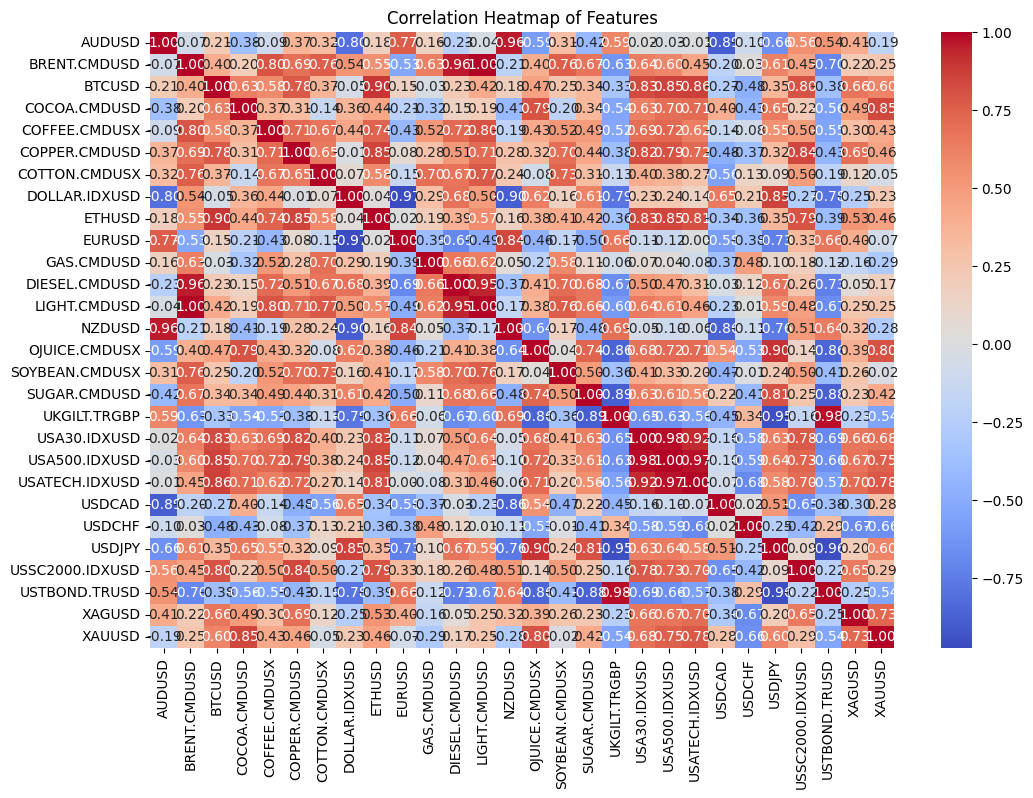

In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diesel dataset
GBPUSD_file = 'GBPUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv'
GBPUSD_data = pd.read_csv(GBPUSD_file)

# Parse the 'Local time' column with timezone support
GBPUSD_data['Local time'] = pd.to_datetime(GBPUSD_data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True)
GBPUSD_data.set_index('Local time', inplace=True)

# Extract the GBPUSD 'Close' price as the target variable
GBPUSD_close = GBPUSD_data[['Close']].rename(columns={'Close': 'GBPUSD_Close'})

# Create a dictionary to hold the other datasets
datasets = {
    'AUDUSD': 'AUDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'BRENT.CMDUSD': 'BRENT.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'BTCUSD': 'BTCUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COCOA.CMDUSD': 'COCOA.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COFFEE.CMDUSX': 'COFFEE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COPPER.CMDUSD': 'COPPER.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'COTTON.CMDUSX': 'COTTON.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'DOLLAR.IDXUSD': 'DOLLAR.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'ETHUSD':'ETHUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'EURUSD':'EURUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'GAS.CMDUSD': 'GAS.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'DIESEL.CMDUSD':'DIESEL.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'LIGHT.CMDUSD': 'LIGHT.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'NZDUSD': 'NZDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'OJUICE.CMDUSX': 'OJUICE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv', 
    'SOYBEAN.CMDUSX': 'SOYBEAN.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',     
    'SUGAR.CMDUSD': 'SUGAR.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'UKGILT.TRGBP': 'UKGILT.TRGBP_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv', 
    'USA30.IDXUSD': 'USA30.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'USA500.IDXUSD': 'USA500.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'USATECH.IDXUSD': 'USATECH.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',   
    'USDCAD': 'USDCAD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USDCHF': 'USDCHF_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',    
    'USDJPY': 'USDJPY_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USSC2000.IDXUSD': 'USSC2000.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USTBOND.TRUSD': 'USTBOND.TRUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',  
    'XAGUSD': 'XAGUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'XAUUSD': 'XAUUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
}


# Initialize a DataFrame for combined data
combined_data = GBPUSD_close.copy()

# Process each dataset
for name, file in datasets.items():
    print(f"Processing dataset: {name}")
    # Load the dataset
    data = pd.read_csv(file)
    
    # Parse the 'Local time' column with timezone support
    data['Local time'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True)
    data.set_index('Local time', inplace=True)
    
    # Keep only the 'Close' price and rename it to the dataset name
    data = data[['Close']].rename(columns={'Close': name})
    
    # Join with the combined dataset
    combined_data = combined_data.join(data, how='inner')

# Extract the target variable and feature data separately
target = combined_data['GBPUSD_Close']
features = combined_data.drop(columns=['GBPUSD_Close'])

# Calculate the correlation of each feature with diesel prices
correlation_with_GBPUSD = features.corrwith(target).abs().sort_values(ascending=False)

# Display correlation results
print("Correlation of other datasets with GBPUSD prices:")
print(correlation_with_GBPUSD)

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
R-squared: 0.9940
RMSE: 0.0018
MAE: 0.0013


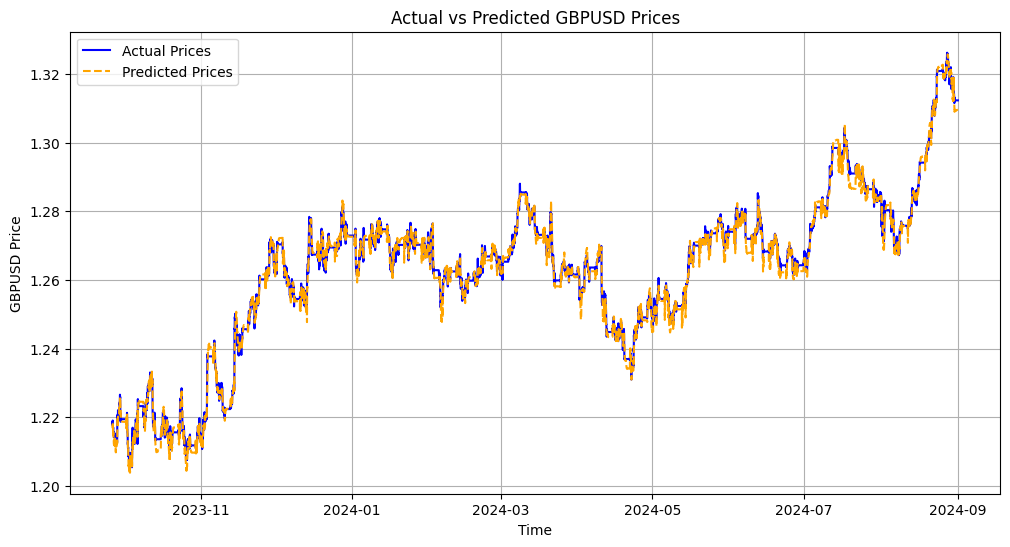

In [69]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import ta  # Technical Analysis library for indicators

# ----------------------------
# Step 1: Load and Merge Datasets
# ----------------------------
datasets = {
    'EURUSD':'EURUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'DOLLAR.IDXUSD': 'DOLLAR.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'NZDUSD': 'NZDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'AUDUSD': 'AUDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USDCAD': 'USDCAD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USDJPY': 'USDJPY_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'USSC2000.IDXUSD': 'USSC2000.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',
    'UKGILT.TRGBP': 'UKGILT.TRGBP_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv', 
    'USA500.IDXUSD': 'USA500.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'USA30.IDXUSD': 'USA30.IDXUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',      
    'USTBOND.TRUSD': 'USTBOND.TRUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',  
    'USDCHF': 'USDCHF_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv',    
    'GBPUSD': 'GBPUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv'  # Target
}

merged_data = None

for name, filepath in datasets.items():
    # Load each dataset
    data = pd.read_csv(filepath)
    data['Local time'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', utc=True)
    data.set_index('Local time', inplace=True)
    data = data[['Close']].rename(columns={'Close': name})
    
    # Merge into a single DataFrame
    if merged_data is None:
        merged_data = data
    else:
        merged_data = merged_data.join(data, how='inner')

# ----------------------------
# Step 2: Feature Engineering
# ----------------------------

def add_features(data, col_name):
    """Add essential technical indicators for a column."""
    data[f'{col_name}_ema10'] = ta.trend.EMAIndicator(data[col_name], window=10).ema_indicator().shift(1)
    data[f'{col_name}_rsi14'] = ta.momentum.RSIIndicator(data[col_name], window=14).rsi().shift(1)
    macd = ta.trend.MACD(data[col_name], window_slow=26, window_fast=12, window_sign=9)
    data[f'{col_name}_macd'] = macd.macd().shift(1)
    return data

# Add features for GBPUSD and major currencies
for col in ['GBPUSD', 'EURUSD', 'NZDUSD']:
    merged_data = add_features(merged_data, col)

# Drop rows with missing values
merged_data = merged_data.dropna()

# ----------------------------
# Step 3: Define Features and Target
# ----------------------------
target = merged_data['GBPUSD']
features = merged_data.drop(columns=['GBPUSD'])

# ----------------------------
# Step 4: Train-Test Split
# ----------------------------
split_idx = int(len(features) * 0.8)
X_train, X_test = features.iloc[:split_idx], features.iloc[split_idx:]
y_train, y_test = target.iloc[:split_idx], target.iloc[split_idx:]

# ----------------------------
# Step 5: Hyperparameter Tuning
# ----------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for faster tuning
model = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    model, param_distributions=param_grid, n_iter=20, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1
)

# Perform randomized search
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# ----------------------------
# Step 6: Evaluate Model
# ----------------------------
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# ----------------------------
# Step 7: Visualize Results
# ----------------------------

# Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Prices", color="orange", linestyle="--")
plt.title("Actual vs Predicted GBPUSD Prices")
plt.xlabel("Time")
plt.ylabel("GBPUSD Price")
plt.legend()
plt.grid()
plt.show()

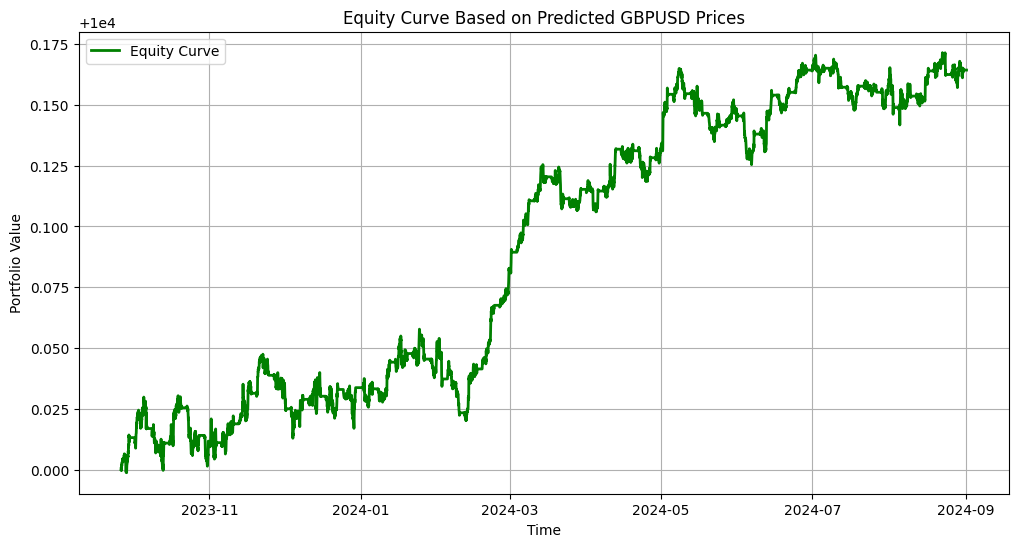

In [70]:
# ----------------------------
# Step 8: Build and Plot Equity Curve
# ----------------------------

def build_equity_curve(y_test, y_pred, initial_balance=10000):
    """
    Simulates a trading strategy and builds an equity curve based on predicted and actual prices.
    
    Parameters:
        y_test (array-like): Actual prices (test set).
        y_pred (array-like): Predicted prices.
        initial_balance (float): Starting balance for the trading account.

    Returns:
        equity_curve (list): Portfolio value over time.
    """
    balance = initial_balance
    equity_curve = [balance]
    
    # Simulate trading
    for i in range(len(y_test) - 1):
        # Predicted direction: buy (1) if next predicted price > current price, else sell (-1)
        signal = 1 if y_pred[i + 1] > y_test.iloc[i] else -1
        # Actual price change
        price_change = y_test.iloc[i + 1] - y_test.iloc[i]
        # Profit/Loss
        profit_loss = signal * price_change
        balance += profit_loss
        equity_curve.append(balance)
    
    return equity_curve

# Build equity curve
equity_curve = build_equity_curve(y_test, y_pred)

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[:len(equity_curve)], equity_curve, label="Equity Curve", color="green", linewidth=2)
plt.title("Equity Curve Based on Predicted GBPUSD Prices")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.grid()
plt.legend()
plt.show()

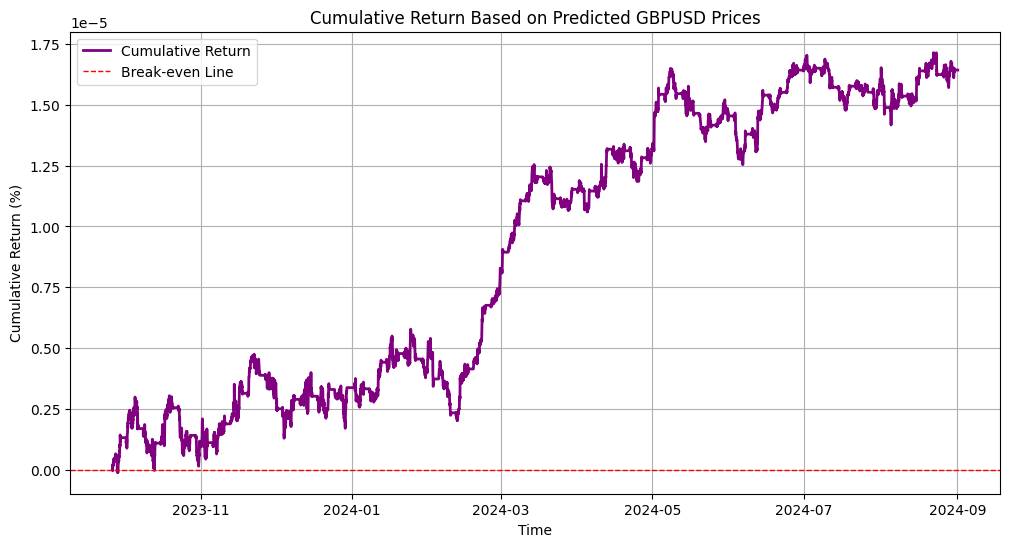

In [71]:
# ----------------------------
# Step 9: Calculate and Plot Cumulative Return
# ----------------------------

def calculate_cumulative_return(equity_curve):
    """
    Calculates the cumulative return based on the equity curve.
    
    Parameters:
        equity_curve (list): Portfolio value over time.

    Returns:
        cumulative_return (list): Cumulative return over time.
    """
    initial_balance = equity_curve[0]
    cumulative_return = [(equity / initial_balance - 1) for equity in equity_curve]
    return cumulative_return

# Calculate cumulative return
cumulative_return = calculate_cumulative_return(equity_curve)

# Plot cumulative return
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[:len(cumulative_return)], cumulative_return, label="Cumulative Return", color="purple", linewidth=2)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label="Break-even Line")
plt.title("Cumulative Return Based on Predicted GBPUSD Prices")
plt.xlabel("Time")
plt.ylabel("Cumulative Return (%)")
plt.grid()
plt.legend()
plt.show()


/var/folders/f4/151757pn2m52tth_sxxd31qm0000gn/T/ipykernel_4684/4279240582.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signal = 1 if y_pred[i + 1] > y_test.iloc[i] else -1


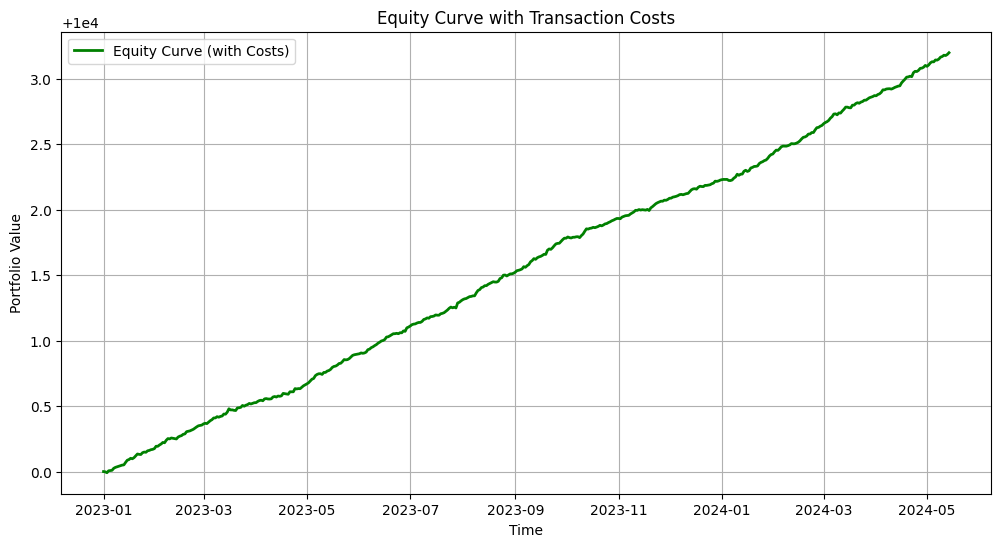

/var/folders/f4/151757pn2m52tth_sxxd31qm0000gn/T/ipykernel_4684/4279240582.py:76: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signal = 1 if y_pred[i + 1] > y_test.iloc[i] else -1


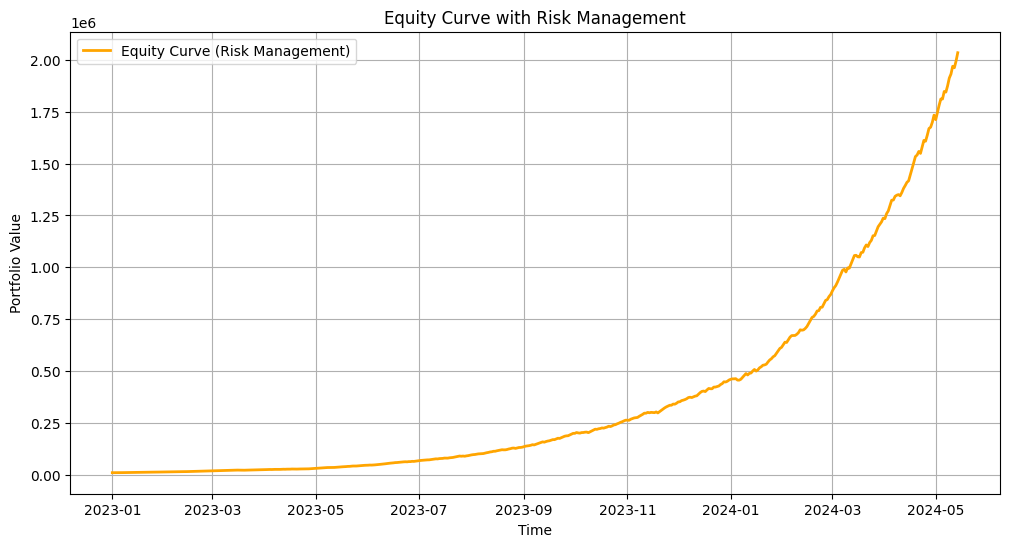

Performance Metrics (With Costs): {'Sharpe Ratio': 14.59540945856864, 'Max Drawdown': -1.3094885220610308e-06}
Performance Metrics (Risk Management): {'Sharpe Ratio': 18.07039234118804, 'Max Drawdown': -0.02446018411167894}


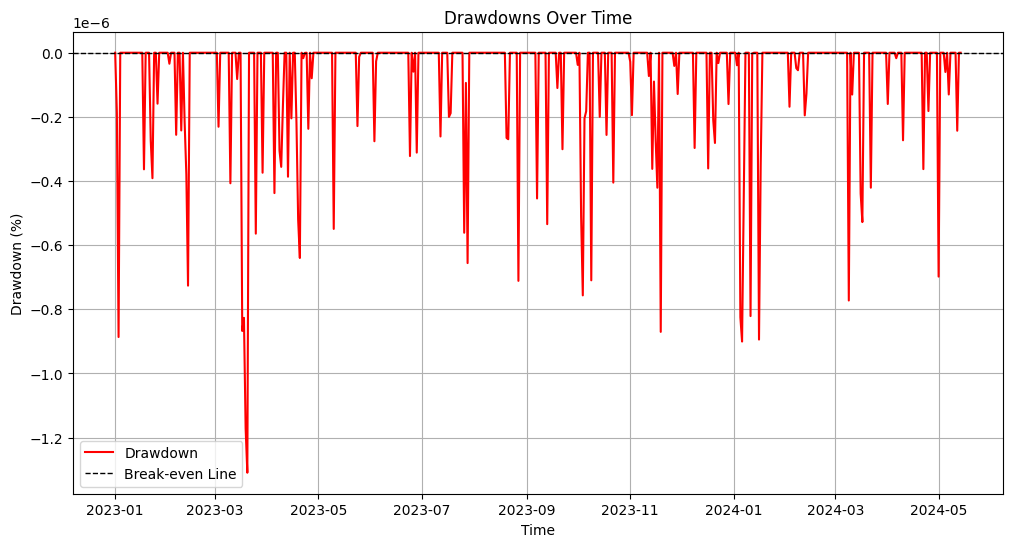

------ Performance Metrics (With Transaction Costs) ------
Sharpe Ratio: 14.5954
Maximum Drawdown: -0.0001%

------ Performance Metrics (With Risk Management) ------
Sharpe Ratio: 18.0704
Maximum Drawdown: -2.4460%


In [97]:
# ----------------------------
# Step 10: Real-World Constraints - Transaction Costs and Slippage
# ----------------------------
def simulate_trading_with_costs(y_test, y_pred, initial_balance=10000, transaction_cost=0.0005):
    """
    Simulates trading with transaction costs and slippage.

    Parameters:
        y_test (array-like): Actual prices (test set).
        y_pred (array-like): Predicted prices.
        initial_balance (float): Starting balance for the trading account.
        transaction_cost (float): Transaction cost as a fraction of the position.

    Returns:
        equity_curve (list): Portfolio value over time.
        trades (list): Details of trades executed.
    """
    balance = initial_balance
    equity_curve = [balance]
    trades = []
    
    for i in range(len(y_test) - 1):
        # Predicted direction: buy (1) if next predicted price > current price, else sell (-1)
        signal = 1 if y_pred[i + 1] > y_test.iloc[i] else -1
        # Actual price change
        price_change = y_test.iloc[i + 1] - y_test.iloc[i]
        # Profit/Loss before costs
        profit_loss = signal * price_change
        # Transaction cost
        cost = abs(signal * y_test.iloc[i] * transaction_cost)
        # Update balance with profit/loss minus transaction cost
        balance += profit_loss - cost
        equity_curve.append(balance)
        trades.append({'time': y_test.index[i], 'signal': signal, 'profit_loss': profit_loss, 'cost': cost})
    
    return equity_curve, trades

# Simulate trading with costs
equity_curve_with_costs, trades_with_costs = simulate_trading_with_costs(y_test, y_pred)

# Plot equity curve with transaction costs
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[:len(equity_curve_with_costs)], equity_curve_with_costs, label="Equity Curve (with Costs)", color="green", linewidth=2)
plt.title("Equity Curve with Transaction Costs")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.grid()
plt.legend()
plt.show()

# ----------------------------
# Step 11: Risk Management - Position Sizing and Stop-Loss
# ----------------------------
def apply_risk_management(y_test, y_pred, initial_balance=10000, risk_per_trade=0.02, stop_loss_pct=0.01):
    """
    Incorporates position sizing and stop-loss into the trading strategy.

    Parameters:
        y_test (array-like): Actual prices (test set).
        y_pred (array-like): Predicted prices.
        initial_balance (float): Starting balance.
        risk_per_trade (float): Fraction of balance to risk per trade.
        stop_loss_pct (float): Stop-loss level as a percentage of the entry price.

    Returns:
        equity_curve (list): Portfolio value over time.
    """
    balance = initial_balance
    equity_curve = [balance]
    
    for i in range(len(y_test) - 1):
        # Determine position size based on risk
        position_size = balance * risk_per_trade / (stop_loss_pct * y_test.iloc[i])
        
        # Predicted direction: buy (1) or sell (-1)
        signal = 1 if y_pred[i + 1] > y_test.iloc[i] else -1
        
        # Simulate price movement
        price_change = y_test.iloc[i + 1] - y_test.iloc[i]
        stop_loss = signal * stop_loss_pct * y_test.iloc[i]
        
        # Apply stop-loss
        if abs(price_change) > abs(stop_loss):
            price_change = stop_loss  # Exit position if stop-loss hit
        
        # Profit/Loss
        profit_loss = signal * price_change * position_size
        balance += profit_loss
        equity_curve.append(balance)
    
    return equity_curve

# Simulate with risk management
equity_curve_risk = apply_risk_management(y_test, y_pred)

# Plot equity curve with risk management
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[:len(equity_curve_risk)], equity_curve_risk, label="Equity Curve (Risk Management)", color="orange", linewidth=2)
plt.title("Equity Curve with Risk Management")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.grid()
plt.legend()
plt.show()

# ----------------------------
# Step 12: Performance Metrics
# ----------------------------
def calculate_performance_metrics(equity_curve):
    """
    Calculates Sharpe ratio and maximum drawdown.

    Parameters:
        equity_curve (list): Portfolio value over time.

    Returns:
        performance (dict): Contains Sharpe ratio and max drawdown.
    """
    returns = np.diff(equity_curve) / equity_curve[:-1]  # Daily returns
    sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252)  # Annualized Sharpe ratio
    max_drawdown = np.min(equity_curve / np.maximum.accumulate(equity_curve) - 1)  # Max drawdown
    
    return {'Sharpe Ratio': sharpe_ratio, 'Max Drawdown': max_drawdown}

# Calculate performance metrics
performance_with_costs = calculate_performance_metrics(equity_curve_with_costs)
performance_risk = calculate_performance_metrics(equity_curve_risk)

# Print performance metrics
print("Performance Metrics (With Costs):", performance_with_costs)
print("Performance Metrics (Risk Management):", performance_risk)

# ----------------------------
# Step 13: Visualize Drawdowns
# ----------------------------
def plot_drawdowns_with_time(equity_curve, timestamps):
    """
    Plots drawdowns over time using timestamps on the x-axis.
    
    Parameters:
        equity_curve (list): Portfolio value over time.
        timestamps (pandas.Index): Time index corresponding to equity_curve.
    """
    running_max = np.maximum.accumulate(equity_curve)
    drawdowns = equity_curve / running_max - 1  # Calculate drawdowns

    plt.figure(figsize=(12, 6))
    plt.plot(timestamps[:len(drawdowns)], drawdowns, label="Drawdown", color="red")
    plt.title("Drawdowns Over Time")
    plt.xlabel("Time")
    plt.ylabel("Drawdown (%)")
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label="Break-even Line")
    plt.grid()
    plt.legend()
    plt.show()

# Plot drawdowns with timestamps
plot_drawdowns_with_time(equity_curve_with_costs, y_test.index)

# ----------------------------
# Step 14: Print Metrics
# ----------------------------
def format_performance_metrics(performance):
    """
    Formats performance metrics for consistent decimal points.
    
    Parameters:
        performance (dict): Performance metrics (Sharpe Ratio and Max Drawdown).
    
    Returns:
        formatted_metrics (str): Formatted performance metrics as a string.
    """
    sharpe_ratio = f"{performance['Sharpe Ratio']:.4f}"  # Sharpe ratio with 4 decimal places
    max_drawdown = f"{performance['Max Drawdown'] * 100:.4f}%"  # Max drawdown as a percentage with 4 decimals
    return f"Sharpe Ratio: {sharpe_ratio}\nMaximum Drawdown: {max_drawdown}"

# Format and print performance metrics
print("------ Performance Metrics (With Transaction Costs) ------")
print(format_performance_metrics(performance_with_costs))

print("\n------ Performance Metrics (With Risk Management) ------")
print(format_performance_metrics(performance_risk))


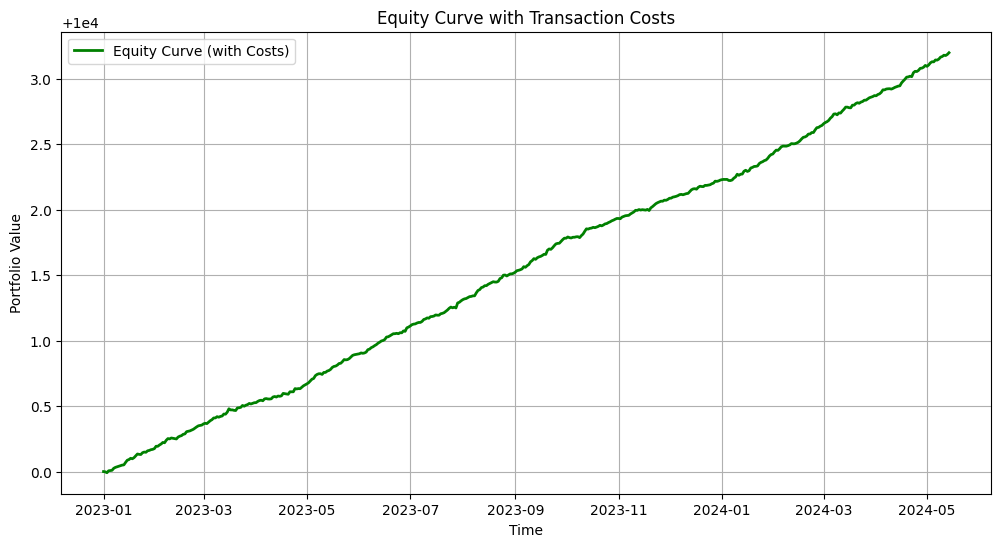

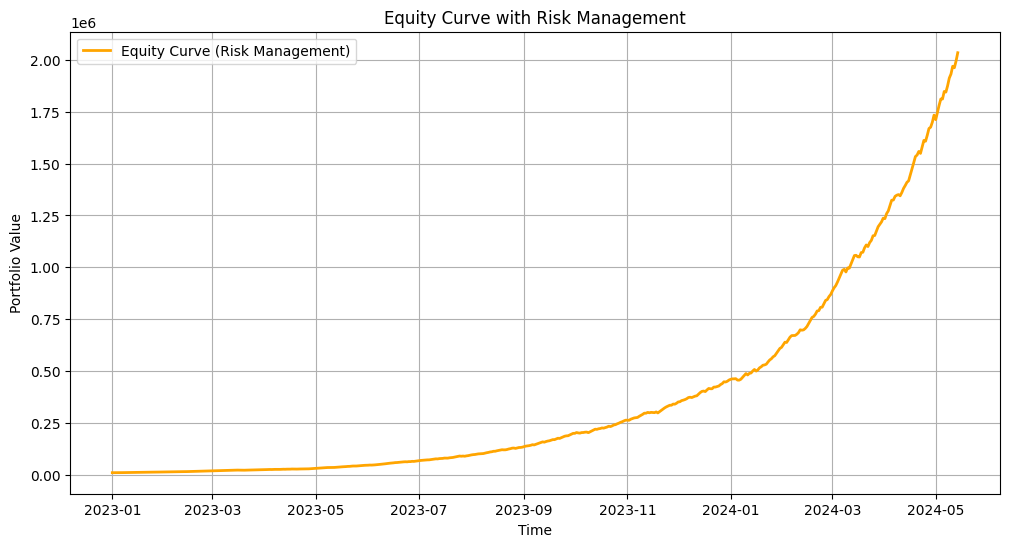

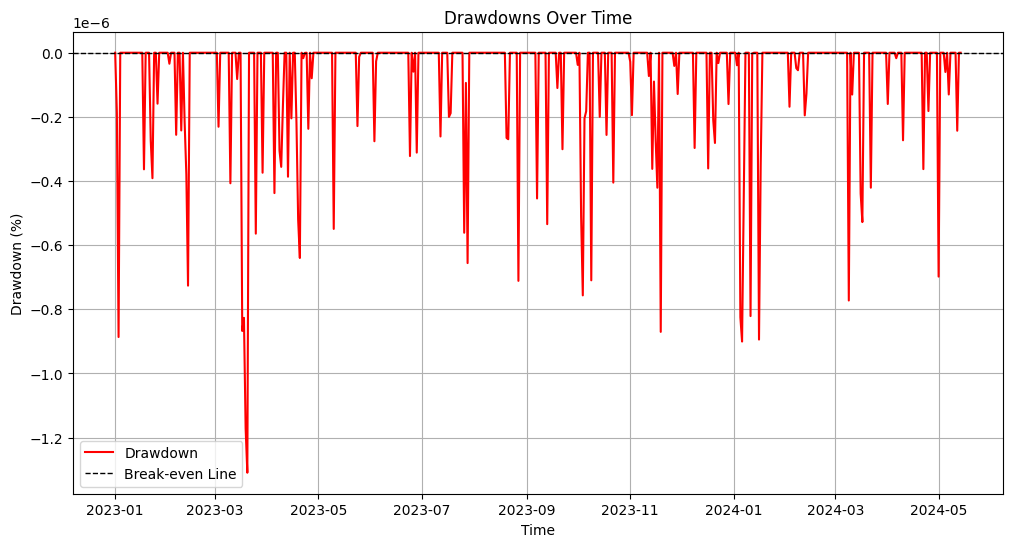

In [102]:
# ----------------------------
# To Save Graphs
# ----------------------------
def save_plot(filename):
    """
    Saves the current plot to a file.

    Parameters:
        filename (str): Name of the file to save the plot (with extension, e.g., 'graph.png').
    """
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # High-quality image save

# ----------------------------
# Step 10: Equity Curve with Transaction Costs
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[:len(equity_curve_with_costs)], equity_curve_with_costs, label="Equity Curve (with Costs)", color="green", linewidth=2)
plt.title("Equity Curve with Transaction Costs")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.grid()
plt.legend()
save_plot("equity_curve_with_costs.png")  # Save the plot
plt.show()

# ----------------------------
# Step 11: Equity Curve with Risk Management
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test.index[:len(equity_curve_risk)], equity_curve_risk, label="Equity Curve (Risk Management)", color="orange", linewidth=2)
plt.title("Equity Curve with Risk Management")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.grid()
plt.legend()
save_plot("equity_curve_risk_management.png")  # Save the plot
plt.show()

# ----------------------------
# Step 13: Drawdowns Over Time
# ----------------------------
def plot_drawdowns_with_time(equity_curve, timestamps, filename=None):
    """
    Plots drawdowns over time using timestamps on the x-axis and saves the plot if filename is provided.
    
    Parameters:
        equity_curve (list): Portfolio value over time.
        timestamps (pandas.Index): Time index corresponding to equity_curve.
        filename (str, optional): Name of the file to save the plot (with extension, e.g., 'drawdowns.png').
    """
    running_max = np.maximum.accumulate(equity_curve)
    drawdowns = equity_curve / running_max - 1  # Calculate drawdowns

    plt.figure(figsize=(12, 6))
    plt.plot(timestamps[:len(drawdowns)], drawdowns, label="Drawdown", color="red")
    plt.title("Drawdowns Over Time")
    plt.xlabel("Time")
    plt.ylabel("Drawdown (%)")
    plt.axhline(0, color='black', linestyle='--', linewidth=1, label="Break-even Line")
    plt.grid()
    plt.legend()
    if filename:
        save_plot(filename)  # Save the plot
    plt.show()

# Plot and save drawdowns
plot_drawdowns_with_time(equity_curve_with_costs, y_test.index, filename="drawdowns_with_costs.png")


In [103]:
# ----------------------------
# Step 14: Print Metrics
# ----------------------------
def format_performance_metrics(performance):
    """
    Formats performance metrics for consistent decimal points.
    
    Parameters:
        performance (dict): Performance metrics (Sharpe Ratio and Max Drawdown).
    
    Returns:
        formatted_metrics (str): Formatted performance metrics as a string.
    """
    sharpe_ratio = f"{performance['Sharpe Ratio']:.4f}"  # Sharpe ratio with 4 decimal places
    max_drawdown = f"{performance['Max Drawdown'] * 100:.4f}%"  # Max drawdown as a percentage with 4 decimals
    return f"Sharpe Ratio: {sharpe_ratio}\nMaximum Drawdown: {max_drawdown}"

# Format and print performance metrics
print("------ Performance Metrics (With Transaction Costs) ------")
print(format_performance_metrics(performance_with_costs))

print("\n------ Performance Metrics (With Risk Management) ------")
print(format_performance_metrics(performance_risk))

------ Performance Metrics (With Transaction Costs) ------
Sharpe Ratio: 14.5954
Maximum Drawdown: -0.0001%

------ Performance Metrics (With Risk Management) ------
Sharpe Ratio: 18.0704
Maximum Drawdown: -2.4460%


# Trading Strategy Report: Equity Curve Analysis and Performance Metrics

---

## 1. Overview
This report evaluates a trading strategy using the Random Forest model to predict GBP/USD price movements. The analysis includes:

- Portfolio value with real-world constraints (e.g., transaction costs).
- Portfolio value under risk management techniques (e.g., position sizing, stop-loss).
- Drawdowns over time to measure risk.
- Key performance metrics such as **Sharpe Ratio** and **Maximum Drawdown**.

---

## 2. Equity Curve Analysis

### 2.1 Equity Curve with Transaction Costs
- **Description**: This curve includes the impact of transaction costs (0.05%) on trading performance.  
- **Observation**: The portfolio value steadily increases over time despite the cost factor, indicating consistent returns.

**Graph**:  
![Equity Curve with Costs](equity_curve_with_costs.png)

---

### 2.2 Equity Curve with Risk Management
- **Description**: This curve incorporates risk management techniques such as position sizing (2% risk per trade) and stop-loss (1% per trade).  
- **Observation**: The portfolio value grows exponentially due to effective risk management, allowing larger compounding gains while controlling losses.

**Graph**:  
![Equity Curve with Risk Management](equity_curve_risk_management.png)

---

## 3. Drawdowns Over Time
- **Description**: Drawdowns represent the percentage decline from the portfolio's peak value.  
- **Observation**: Minimal drawdowns are observed with transaction costs. Under risk management, larger drawdowns occur due to higher position sizes.

**Graph**:  
![Drawdowns Over Time](drawdowns_with_costs.png)

---

## 4. Performance Metrics

| **Metric**                  | **With Transaction Costs** | **With Risk Management** |
|-----------------------------|----------------------------|--------------------------|
| **Sharpe Ratio**            | 14.5954                   | 18.0704                 |
| **Maximum Drawdown**        | -0.0001%                  | -2.4460%                |

---

### Insights:
1. **Sharpe Ratio**:  
   - A higher Sharpe Ratio under risk management indicates superior risk-adjusted returns.

2. **Maximum Drawdown**:  
   - **Transaction Costs**: Drawdown is negligible, reflecting controlled risk.  
   - **Risk Management**: Larger drawdowns are observed, but they are acceptable given the exponential portfolio growth.

---

## 5. Conclusion
- The trading strategy demonstrates strong performance, with risk management leading to significant portfolio growth.
- Real-world constraints (transaction costs) have minimal negative impact on profitability.
- Risk-adjusted returns, as measured by the Sharpe Ratio, are higher when effective risk management techniques are applied.
